### 使用plt.scatter 繪製散佈圖
- 對比於plt.plot將第三個參數設定為'o'來畫scatter，plt.scatter可以更客製化每一個點。
- 效率上來說則是plt.plot比較高，因為是採取點的複製。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

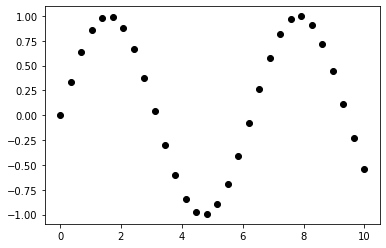

In [2]:
# 1. plt.plot

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

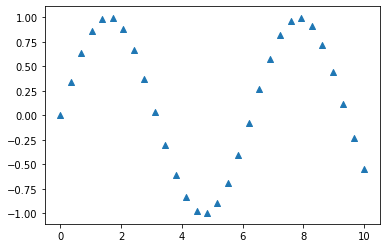

In [3]:
# 2. plt.scatter

plt.scatter(x, y, marker='^')

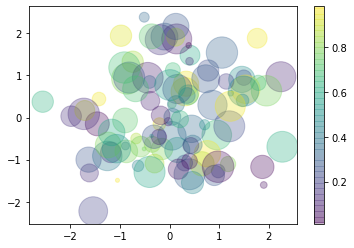

In [4]:
# 客製化的例子: 大小、顏色

rng = np.random.RandomState(0)
x = rng.randn(100)    # (100,) 常態分配
y = rng.randn(100)
colors = rng.rand(100) # (100,) 均勻分配
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar()  # 顯示顏色刻度

In [5]:
# 透過iris資料去了解資料看看, 透過scatter plot

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

x = iris['data']
y = iris['target']

In [6]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


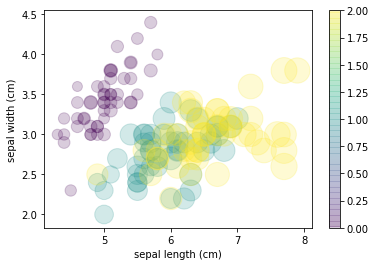

In [7]:
# 畫前兩個特徵來散步圖看看, 搭配顏色當作類別, 第四個特徵當作大小


plt.scatter(x.iloc[:, 0], x.iloc[:, 1], alpha=0.2, s=100*x.iloc[:, 2], c=y)
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.colorbar()

**上面例子可以發現這兩個特徵是可以很好地將群體分開**

### 視覺化誤差

<ErrorbarContainer object of 3 artists>

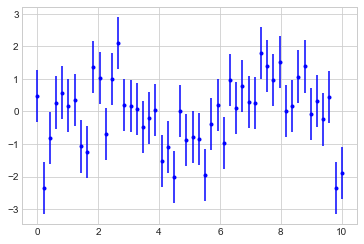

In [8]:
# 基本的誤差圖
# 可以設定xerr or yerr去化線條

plt.style.use('seaborn-whitegrid')


x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.b')

<ErrorbarContainer object of 3 artists>

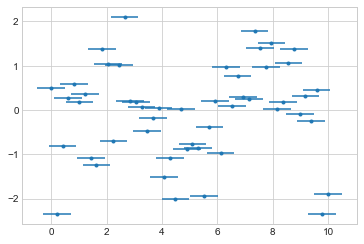

In [9]:
# xerr例子(甚至能一起)

plt.errorbar(x, y, xerr=0.5, fmt='.')

<ErrorbarContainer object of 3 artists>

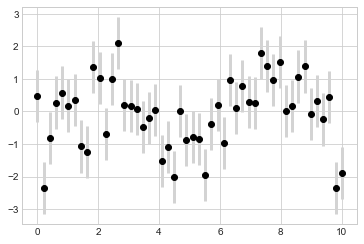

In [10]:
# 上面例子可以繼續為調一些地方

plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

In [11]:
# 連續型的誤差: 沒有內建的，透過plt.plot + plt.fill_between去產生。

from sklearn.gaussian_process import GaussianProcessRegressor

# 簡單定義模型與資料
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 計算高斯過程
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

# 預測的點 + 誤差
xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std   # 95 confidence interval

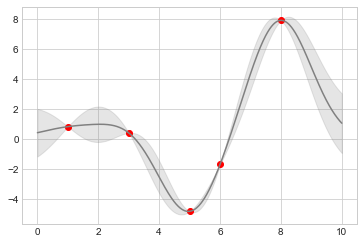

In [12]:
# 視覺化結果

plt.plot(xdata, ydata, 'or')             # 真實值描點
plt.plot(xfit, yfit, '-', color='gray')  # 高斯模型預測軌跡(線)
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)  # 高斯模型2倍標準差預測

## 密度圖與等高線圖
- 用於在二為空間呈現三維資料。
- 有三個函式可以完成此工作
    - plt.contour: 建立等高線圖
    - plt.contourf: 建立填色的等高線圖
    - plt.imshow: 用來顯示影像

In [13]:
plt.style.use('seaborn-white')   # 空白才適合畫

### 三維函數的視覺化
- 我比較少用到。

In [14]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [15]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)    # Return coordinate matrices from coordinate vectors.
Z = f(X, Y)

In [16]:
X.shape, Y.shape, Z.shape

((40, 50), (40, 50), (40, 50))

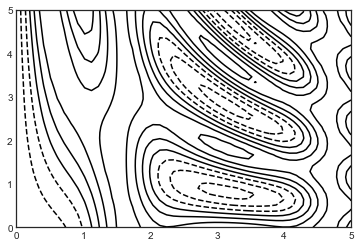

In [17]:
plt.contour(X, Y, Z, colors='black')

### 直方圖、分箱法及密度
- 直方圖可以快速瞭解資料集

In [18]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([ 83., 103., 109.,  97., 112., 105.,  98.,  98.,  89., 106.]),
 array([4.57470415e-04, 1.00284601e-01, 2.00111732e-01, 2.99938863e-01,
        3.99765994e-01, 4.99593125e-01, 5.99420256e-01, 6.99247387e-01,
        7.99074517e-01, 8.98901648e-01, 9.98728779e-01]),
 <a list of 10 Patch objects>)

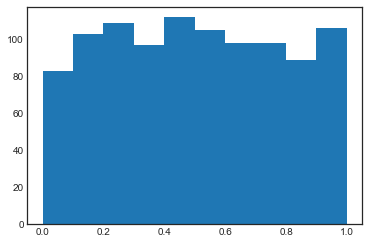

In [19]:
# 均勻分配

data = np.random.rand(1000)

plt.hist(data)

(array([  9.,  28., 107., 226., 269., 196., 118.,  38.,   7.,   2.]),
 array([-3.10784229, -2.42143783, -1.73503337, -1.04862891, -0.36222445,
         0.32418001,  1.01058447,  1.69698893,  2.38339339,  3.06979785,
         3.75620231]),
 <a list of 10 Patch objects>)

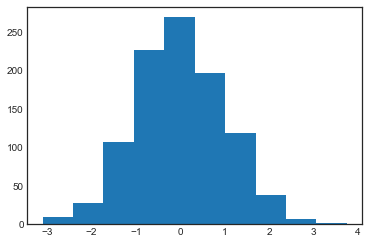

In [20]:
# 標準常態分配直方圖

data = np.random.randn(1000)
plt.hist(data) # 資料是1維資料點，有更多用法，基本用法是如此。

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


(array([0.0043706 , 0.0131118 , 0.021853  , 0.02622361, 0.021853  ,
        0.07430022, 0.10926502, 0.13985923, 0.21853005, 0.25786546,
        0.33653628, 0.39335409, 0.39335409, 0.39335409, 0.38898349,
        0.37150108, 0.28408906, 0.20104764, 0.19230644, 0.17045344,
        0.15297103, 0.05681781, 0.06118841, 0.04807661, 0.021853  ,
        0.0087412 , 0.        , 0.0043706 , 0.        , 0.0043706 ]),
 array([-3.10784229, -2.8790408 , -2.65023932, -2.42143783, -2.19263634,
        -1.96383486, -1.73503337, -1.50623188, -1.2774304 , -1.04862891,
        -0.81982742, -0.59102594, -0.36222445, -0.13342296,  0.09537852,
         0.32418001,  0.5529815 ,  0.78178298,  1.01058447,  1.23938596,
         1.46818744,  1.69698893,  1.92579041,  2.1545919 ,  2.38339339,
         2.61219487,  2.84099636,  3.06979785,  3.29859933,  3.52740082,
         3.75620231]),
 <a list of 1 Patch objects>)

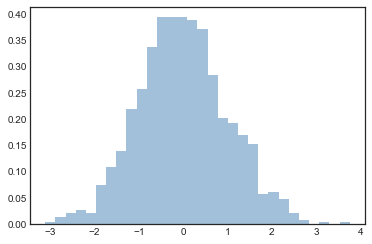

In [21]:
# hist() 更多的微調: normed=True: 直接轉成機率

plt.hist(data, bins=30, normed=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
         edgecolor='none')

C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\aband\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


(array([0.00312336, 0.00312336, 0.00937009, 0.00312336, 0.02186355,
        0.02498691, 0.00937009, 0.0437271 , 0.02811028, 0.04060373,
        0.06246728, 0.07496074, 0.08433083, 0.10307101, 0.12805792,
        0.16241493, 0.16866165, 0.18115511, 0.18427847, 0.21863548,
        0.20614202, 0.22175884, 0.17178502, 0.16241493, 0.15929156,
        0.12805792, 0.10619437, 0.10307101, 0.07496074, 0.04997382,
        0.0437271 , 0.034357  , 0.02498691, 0.01874018, 0.02498691,
        0.01874018, 0.00312336, 0.00937009, 0.00312336, 0.00312336]),
 array([-3.33014936, -3.00998174, -2.68981413, -2.36964651, -2.04947889,
        -1.72931128, -1.40914366, -1.08897604, -0.76880842, -0.44864081,
        -0.12847319,  0.19169443,  0.51186205,  0.83202966,  1.15219728,
         1.4723649 ,  1.79253251,  2.11270013,  2.43286775,  2.75303537,
         3.07320298,  3.3933706 ,  3.71353822,  4.03370584,  4.35387345,
         4.67404107,  4.99420869,  5.3143763 ,  5.63454392,  5.95471154,
         6.27487

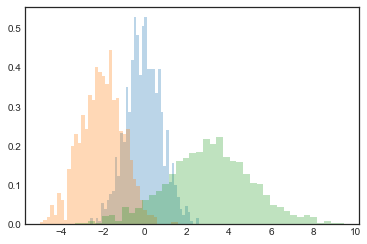

In [22]:
# ***透過histtype='stepfilled'和透明度的設定，可以同時比較多個資料分配(特徵)

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [36]:
# 再者, 有時候想要知道直方圖的資料點數目、範圍, 不想畫圖, 可以透過np.histogram()取得

counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 37, 333, 465, 156,   9], dtype=int64)

### 二維的直方圖和裝箱法
- 將二維的資料點放入箱子內。

In [33]:
mean = [0, 0]
cov = [[1, 1],  [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T    # (2, 10000)

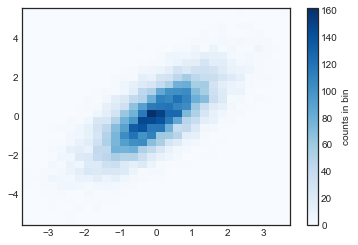

In [35]:
# plt.hist2d: 二維直方圖

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [38]:
# np.histogram2d: 得到資料而不用畫圖

counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.shape

(30, 30)

#### 如果要一般化到更多維，可以用mp.histogramdd

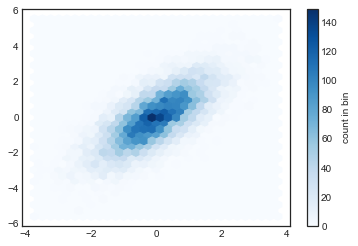

In [39]:
# plt.hexbin: 六角形的裝箱, 形狀較為自然, 但效果基本上跟plt.hist2d同。

plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [44]:
# 核密度估計(KDE): 多維空間評估密度(略)

from scipy.stats import gaussian_kde

# 放入一個matrix大小[n_dims, n_samples]
data = np.vstack([x, y])    # (2, 10000)
kde = gaussian_kde(data)

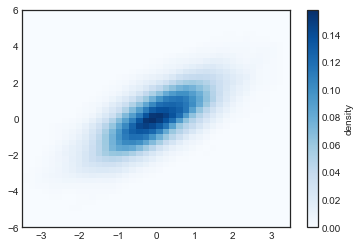

In [47]:
# 在方形格子上估算

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6,  40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower',
          aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')

cb = plt.colorbar()
cb.set_label('density')